
# Importing Packages

In [12]:
# import packages for data cleaning and processing  
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# import modules for preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def rmse(y, y_pred):
    return round(np.sqrt(mean_squared_error(y, y_pred)), 2)
def bias(y, y_pred):
	return round(np.mean(y_pred - y), 2)
def variance(y_pred):
	return "{:.4e}".format(np.mean([yi**2 for yi in y_pred]) - np.mean(y_pred)**2)
def train_test_metrics(y_train, y_test, y_train_pred, y_test_pred):
	print('Training R^2 Score: ', round(r2_score(y_train, y_train_pred), 4))
	print('Training RMSE: ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 2))
	print('Training Bias: ', round(bias(y_train, y_train_pred), 2))
	print('Training Variance: ', variance(y_train_pred))
	print("")
	print('Testing R^2 Score: ', round(r2_score(y_test, y_test_pred), 4))
	print('Testing RMSE: ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2))
	print('Testing Bias: ', round(bias(y_test, y_test_pred), 2))
	print('Testing Variance: ', variance(y_test_pred))

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Feature Selection

In [6]:
# Extract sale date for later processing
df['sale_date'] = [x[:8] for x in df.date]
df.sale_date = df.sale_date.apply(lambda x: datetime.strptime(x, '%Y%m%d'))
df.drop(columns='date', inplace=True)
df.drop(['id'], inplace=True, axis=1)
# Replace anomalous bedroom values and check values in column
df.replace({'bedrooms': {33: 3}}, inplace=True)
df.replace({'bathrooms': {0: 0.25}}, inplace=True)
# Create new feature to incorporate age at the time of sale
df['sale_age'] = df.sale_date.dt.year - df[['yr_built', 'yr_renovated']].max(axis=1)
df.replace({'sale_age': {-1: 0}}, inplace=True)
# Create new feature for age from year built
df['age'] = df.sale_date.dt.year - df.yr_built
df.replace({'age': {-1: 0}}, inplace=True)
# Create binary variable for whether there has been a renovation, has a bathroom, and has been viewed
df['renovated'] = df.yr_renovated.apply(lambda x: x if x==0 else 1)
df['basement'] = df.sqft_basement.apply(lambda x: x if x==0 else 1)
df['viewed'] = df.view.apply(lambda x: x if x==0 else 1)
# Drop original columms as well as the sale_date columns since it is in datetime format
df.drop(['yr_built', 'yr_renovated', 'sale_date', 'sqft_basement', 'view'], inplace=True, axis=1)
# Drop latitude and longitude as zip code has stronger correlation
df.drop(['lat', 'long'], inplace=True, axis=1)

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,sale_age,age,renovated,basement,viewed
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,98178,1340,5650,59,59,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,98125,1690,7639,23,63,1,1,0
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,98028,2720,8062,82,82,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,98136,1360,5000,49,49,0,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,98074,1800,7503,28,28,0,0,0


# Dummy Variables and Polynomial/Interaction Features

In [8]:
# Grab indices of columns for creating dummy variables and create dataframe with dummy variables
dum_feat = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode']]
dum_index = dum_feat.columns
# To prevent what they call the dummy variable trap (related to multicollinearity), drop one of the dummy variable, as well as  the original categorical variable used in creating the dummy variables
df_dum = pd.get_dummies(data=dum_feat, columns=dum_index, drop_first=True, prefix=['bdr', 'bth', 'flr', 'cnd', 'grd', 'zip'])
df_dum.head()

,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bdr_11,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,bth_3.5,bth_3.75,bth_4.0,bth_4.25,bth_4.5,bth_4.75,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Set target variable
y = df['price']

# Baseline Model

In [10]:
poly_feat_1 = df.drop(['price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode'], axis=1)
X = pd.concat([poly_feat_1, df_dum], axis=1)
X.head()

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sale_age,age,renovated,basement,viewed,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bdr_11,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,bth_3.5,bth_3.75,bth_4.0,bth_4.25,bth_4.5,bth_4.75,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1180,5650,0,1180,1340,5650,59,59,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2570,7242,0,2170,1690,7639,23,63,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,770,10000,0,770,2720,8062,82,82,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960,5000,0,1050,1360,5000,49,49,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1680,8080,0,1680,1800,7503,28,28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
X_tr, X_tt, y_tr, y_tt = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)
model = LinearRegression()
lm = model.fit(X_tr, y_tr)
y_tr_pred = lm.predict(X_tr)
y_tt_pred = lm.predict(X_tt)

train_test_metrics(y_tr, y_tt, y_tr_pred, y_tt_pred)

Training R^2 Score:  0.8484
Training RMSE:  140729.35
Training Bias:  0.0
Training Variance:  1.1084e+11

Testing R^2 Score:  0.7756
Testing RMSE:  184171.46
Testing Bias:  -2110.17
Testing Variance:  1.3187e+11


# Degree-2 Polynomial Features Model

In [14]:
# Grab columns for polynominal and interaction features from the original dataframe without dummy variables
poly_feat_2 = df.drop(['price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode'], axis=1)
# Use PolynomialFeatures to create binomial and interaction features
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_data_2 = poly_2.fit_transform(poly_feat_2)
poly_columns_2 = poly_2.get_feature_names(poly_feat_2.columns)
df_poly_2 = pd.DataFrame(poly_data_2, columns=poly_columns_2)
# Concatenating two dataframes together for input into linear regression model
X_poly_2 = pd.concat([df_poly_2, df_dum], axis=1)
X_poly_2.head()

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sale_age,age,renovated,basement,viewed,sqft_living^2,sqft_living sqft_lot,sqft_living waterfront,sqft_living sqft_above,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living sale_age,sqft_living age,sqft_living renovated,sqft_living basement,sqft_living viewed,sqft_lot^2,sqft_lot waterfront,sqft_lot sqft_above,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot sale_age,sqft_lot age,sqft_lot renovated,sqft_lot basement,sqft_lot viewed,waterfront^2,waterfront sqft_above,waterfront sqft_living15,waterfront sqft_lot15,waterfront sale_age,waterfront age,waterfront renovated,waterfront basement,waterfront viewed,sqft_above^2,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above sale_age,sqft_above age,sqft_above renovated,sqft_above basement,sqft_above viewed,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 sale_age,sqft_living15 age,sqft_living15 renovated,sqft_living15 basement,sqft_living15 viewed,sqft_lot15^2,sqft_lot15 sale_age,sqft_lot15 age,sqft_lot15 renovated,sqft_lot15 basement,sqft_lot15 viewed,sale_age^2,sale_age age,sale_age renovated,sale_age basement,sale_age viewed,age^2,age renovated,age basement,age viewed,renovated^2,renovated basement,renovated viewed,basement^2,basement viewed,viewed^2,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bdr_11,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,...,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1180.0,5650.0,0.0,1180.0,1340.0,5650.0,59.0,59.0,0.0,0.0,0.0,1392400.0,6667000.0,0.0,1392400.0,1581200.0,6667000.0,69620.0,69620.0,0.0,0.0,0.0,31922500.0,0.0,6667000.0,7571000.0,31922500.0,333350.0,333350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1392400.0,1581200.0,6667000.0,69620.0,69620.0,0.0,0.0,0.0,1795600.0,7571000.0,79060.0,79060.0,0.0,0.0,0.0,31922500.0,333350.0,333350.0,0.0,0.0,0.0,3481.0,3481.0,0.0,0.0,0.0,3481.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2570.0,7242.0,0.0,2170.0,1690.0,7639.0,23.0,63.0,1.0,1.0,0.0,6604900.0,18611940.0,0.0,5576900.0,4343300.0,19632230.0,59110.0,161910.0,2570.0,2570.0,0.0,52446564.0,0.0,15715140.0,12238980.0,55321638.0,166566.0,456246.0,7242.0,7242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4708900.0,3667300.0,16576630.0,49910.0,136710.0,2170.0,2170.0,0.0,2856100.0,12909910.0,38870.0,106470.0,1690.0,1690.0,0.0,58354321.0,175697.0,481257.0,7639.0,7639.0,0.0,529.0,1449.0,23.0,23.0,0.0,3969.0,63.0,63.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,770.0,10000.0,0.0,770.0,2720.0,8062.0,82.0,82.0,0.0,0.0,0.0,592900.0,7700000.0,0.0,592900.0,2094400.0,6207740.0,

In [15]:
X_tr_2, X_tt_2, y_tr_2, y_tt_2 = train_test_split(X_poly_2, y, random_state=42, test_size=0.2, shuffle=True)
model_2 = LinearRegression()
lm_2 = model_2.fit(X_tr_2, y_tr_2)
y_tr_pred_2 = lm_2.predict(X_tr_2)
y_tt_pred_2 = lm_2.predict(X_tt_2)

train_test_metrics(y_tr_2, y_tt_2, y_tr_pred_2, y_tt_pred_2)

Training R^2 Score:  0.8746
Training RMSE:  127982.1
Training Bias:  -0.0
Training Variance:  1.1427e+11

Testing R^2 Score:  0.8285
Testing RMSE:  161018.59
Testing Bias:  -1812.51
Testing Variance:  1.3496e+11


# Degree-3 Polynomial Features Model

In [16]:
poly_feat_3 = df.drop(['price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode'], axis=1)
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly_data_3 = poly_3.fit_transform(poly_feat_3)
poly_columns_3 = poly_3.get_feature_names(poly_feat_3.columns)
df_poly_3 = pd.DataFrame(poly_data_3, columns=poly_columns_3)
X_poly_3 = pd.concat([df_poly_3, df_dum], axis=1)
X_poly_3.head()

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sale_age,age,renovated,basement,viewed,sqft_living^2,sqft_living sqft_lot,sqft_living waterfront,sqft_living sqft_above,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living sale_age,sqft_living age,sqft_living renovated,sqft_living basement,sqft_living viewed,sqft_lot^2,sqft_lot waterfront,sqft_lot sqft_above,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot sale_age,sqft_lot age,sqft_lot renovated,sqft_lot basement,sqft_lot viewed,waterfront^2,waterfront sqft_above,waterfront sqft_living15,waterfront sqft_lot15,waterfront sale_age,waterfront age,waterfront renovated,waterfront basement,waterfront viewed,sqft_above^2,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above sale_age,sqft_above age,sqft_above renovated,sqft_above basement,sqft_above viewed,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 sale_age,sqft_living15 age,sqft_living15 renovated,sqft_living15 basement,sqft_living15 viewed,sqft_lot15^2,sqft_lot15 sale_age,sqft_lot15 age,sqft_lot15 renovated,sqft_lot15 basement,sqft_lot15 viewed,sale_age^2,sale_age age,sale_age renovated,sale_age basement,sale_age viewed,age^2,age renovated,age basement,age viewed,renovated^2,renovated basement,renovated viewed,basement^2,basement viewed,viewed^2,sqft_living^3,sqft_living^2 sqft_lot,sqft_living^2 waterfront,sqft_living^2 sqft_above,sqft_living^2 sqft_living15,sqft_living^2 sqft_lot15,sqft_living^2 sale_age,sqft_living^2 age,sqft_living^2 renovated,sqft_living^2 basement,sqft_living^2 viewed,sqft_living sqft_lot^2,sqft_living sqft_lot waterfront,sqft_living sqft_lot sqft_above,sqft_living sqft_lot sqft_living15,sqft_living sqft_lot sqft_lot15,sqft_living sqft_lot sale_age,sqft_living sqft_lot age,sqft_living sqft_lot renovated,sqft_living sqft_lot basement,sqft_living sqft_lot viewed,sqft_living waterfront^2,sqft_living waterfront sqft_above,...,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1180.0,5650.0,0.0,1180.0,1340.0,5650.0,59.0,59.0,0.0,0.0,0.0,1392400.0,6667000.0,0.0,1392400.0,1581200.0,6667000.0,69620.0,69620.0,0.0,0.0,0.0,31922500.0,0.0,6667000.0,7571000.0,31922500.0,333350.0,333350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1392400.0,1581200.0,6667000.0,69620.0,69620.0,0.0,0.0,0.0,1795600.0,7571000.0,79060.0,79060.0,0.0,0.0,0.0,31922500.0,333350.0,333350.0,0.0,0.0,0.0,3481.0,3481.0,0.0,0.0,0.0,3481.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.643032e+09,7.867060e+09,0.0,1.643032e+09,1.865816e+09,7.867060e+09,82151600.0,82151600.0,0.0,0.0,0.0,3.766855e+10,0.0,7.867060e+09,8.933780e+09,3.766855e+10,393353000.0,3.933530e+08,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2570.0,7242.0,0.0,2170.0,1690.0,7639.0,23.0,63.0,1.0,1.0,0.0,6604900.0,18611940.0,0.0,5576900.0,4343300.0,19632230.0,59110.0,161910.0,2570.0,2570.0,0.0,52446564.0,0.0,15715140.0,12238980.0,55321638.0,166566.0,456246.0,7242.0,7242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4708900.0,3

In [17]:
X_tr_3, X_tt_3, y_tr_3, y_tt_3 = train_test_split(X_poly_3, y, random_state=42, test_size=0.2, shuffle=True)
model_3 = LinearRegression()
lm_3 = model_3.fit(X_tr_3, y_tr_3)
y_tr_pred_3 = lm_3.predict(X_tr_3)
y_tt_pred_3 = lm_3.predict(X_tt_3)

train_test_metrics(y_tr_3, y_tt_3, y_tr_pred_3, y_tt_pred_3)

Training R^2 Score:  0.7072
Training RMSE:  195584.59
Training Bias:  -0.0
Training Variance:  9.6015e+10

Testing R^2 Score:  0.6028
Testing RMSE:  245050.13
Testing Bias:  1151.19
Testing Variance:  1.3190e+11


# Degree-4 Polynomal Features Model

In [18]:
poly_feat_4 = df.drop(['price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode'], axis=1)
poly_4 = PolynomialFeatures(degree=4, include_bias=False)
poly_data_4 = poly_4.fit_transform(poly_feat_4)
poly_columns_4 = poly_4.get_feature_names(poly_feat_4.columns)
df_poly_4 = pd.DataFrame(poly_data_4, columns=poly_columns_4)
X_poly_4 = pd.concat([df_poly_4, df_dum], axis=1)
X_poly_4.head()

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sale_age,age,renovated,basement,viewed,sqft_living^2,sqft_living sqft_lot,sqft_living waterfront,sqft_living sqft_above,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living sale_age,sqft_living age,sqft_living renovated,sqft_living basement,sqft_living viewed,sqft_lot^2,sqft_lot waterfront,sqft_lot sqft_above,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot sale_age,sqft_lot age,sqft_lot renovated,sqft_lot basement,sqft_lot viewed,waterfront^2,waterfront sqft_above,waterfront sqft_living15,waterfront sqft_lot15,waterfront sale_age,waterfront age,waterfront renovated,waterfront basement,waterfront viewed,sqft_above^2,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above sale_age,sqft_above age,sqft_above renovated,sqft_above basement,sqft_above viewed,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 sale_age,sqft_living15 age,sqft_living15 renovated,sqft_living15 basement,sqft_living15 viewed,sqft_lot15^2,sqft_lot15 sale_age,sqft_lot15 age,sqft_lot15 renovated,sqft_lot15 basement,sqft_lot15 viewed,sale_age^2,sale_age age,sale_age renovated,sale_age basement,sale_age viewed,age^2,age renovated,age basement,age viewed,renovated^2,renovated basement,renovated viewed,basement^2,basement viewed,viewed^2,sqft_living^3,sqft_living^2 sqft_lot,sqft_living^2 waterfront,sqft_living^2 sqft_above,sqft_living^2 sqft_living15,sqft_living^2 sqft_lot15,sqft_living^2 sale_age,sqft_living^2 age,sqft_living^2 renovated,sqft_living^2 basement,sqft_living^2 viewed,sqft_living sqft_lot^2,sqft_living sqft_lot waterfront,sqft_living sqft_lot sqft_above,sqft_living sqft_lot sqft_living15,sqft_living sqft_lot sqft_lot15,sqft_living sqft_lot sale_age,sqft_living sqft_lot age,sqft_living sqft_lot renovated,sqft_living sqft_lot basement,sqft_living sqft_lot viewed,sqft_living waterfront^2,sqft_living waterfront sqft_above,...,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1180.0,5650.0,0.0,1180.0,1340.0,5650.0,59.0,59.0,0.0,0.0,0.0,1392400.0,6667000.0,0.0,1392400.0,1581200.0,6667000.0,69620.0,69620.0,0.0,0.0,0.0,31922500.0,0.0,6667000.0,7571000.0,31922500.0,333350.0,333350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1392400.0,1581200.0,6667000.0,69620.0,69620.0,0.0,0.0,0.0,1795600.0,7571000.0,79060.0,79060.0,0.0,0.0,0.0,31922500.0,333350.0,333350.0,0.0,0.0,0.0,3481.0,3481.0,0.0,0.0,0.0,3481.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.643032e+09,7.867060e+09,0.0,1.643032e+09,1.865816e+09,7.867060e+09,82151600.0,82151600.0,0.0,0.0,0.0,3.766855e+10,0.0,7.867060e+09,8.933780e+09,3.766855e+10,393353000.0,3.933530e+08,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2570.0,7242.0,0.0,2170.0,1690.0,7639.0,23.0,63.0,1.0,1.0,0.0,6604900.0,18611940.0,0.0,5576900.0,4343300.0,19632230.0,59110.0,161910.0,2570.0,2570.0,0.0,52446564.0,0.0,15715140.0,12238980.0,55321638.0,166566.0,456246.0,7242.0,7242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4708900.0,3

In [19]:
X_tr_4, X_tt_4, y_tr_4, y_tt_4 = train_test_split(X_poly_4, y, random_state=42, test_size=0.2, shuffle=True)
model_4 = LinearRegression()
lm_4 = model_4.fit(X_tr_4, y_tr_4)
y_tr_pred_4 = lm_4.predict(X_tr_4)
y_tt_pred_4 = lm_4.predict(X_tt_4)

train_test_metrics(y_tr_4, y_tt_4, y_tr_pred_4, y_tt_pred_4)

Training R^2 Score:  0.4238
Training RMSE:  274374.1
Training Bias:  -0.0
Training Variance:  1.4043e+11

Testing R^2 Score:  -1405.6663
Testing RMSE:  14582701.4
Testing Bias:  380251.71
Testing Variance:  2.1318e+14


# Degree-5 Polynomial Features Model

In [20]:
poly_feat_5 = df.drop(['price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode'], axis=1)
poly_5 = PolynomialFeatures(degree=5, include_bias=False)
poly_data_5 = poly_5.fit_transform(poly_feat_5)
poly_columns_5 = poly_5.get_feature_names(poly_feat_5.columns)
df_poly_5 = pd.DataFrame(poly_data_5, columns=poly_columns_5)
X_poly_5 = pd.concat([df_poly_5, df_dum], axis=1)
X_poly_5.head()

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sale_age,age,renovated,basement,viewed,sqft_living^2,sqft_living sqft_lot,sqft_living waterfront,sqft_living sqft_above,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living sale_age,sqft_living age,sqft_living renovated,sqft_living basement,sqft_living viewed,sqft_lot^2,sqft_lot waterfront,sqft_lot sqft_above,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot sale_age,sqft_lot age,sqft_lot renovated,sqft_lot basement,sqft_lot viewed,waterfront^2,waterfront sqft_above,waterfront sqft_living15,waterfront sqft_lot15,waterfront sale_age,waterfront age,waterfront renovated,waterfront basement,waterfront viewed,sqft_above^2,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above sale_age,sqft_above age,sqft_above renovated,sqft_above basement,sqft_above viewed,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 sale_age,sqft_living15 age,sqft_living15 renovated,sqft_living15 basement,sqft_living15 viewed,sqft_lot15^2,sqft_lot15 sale_age,sqft_lot15 age,sqft_lot15 renovated,sqft_lot15 basement,sqft_lot15 viewed,sale_age^2,sale_age age,sale_age renovated,sale_age basement,sale_age viewed,age^2,age renovated,age basement,age viewed,renovated^2,renovated basement,renovated viewed,basement^2,basement viewed,viewed^2,sqft_living^3,sqft_living^2 sqft_lot,sqft_living^2 waterfront,sqft_living^2 sqft_above,sqft_living^2 sqft_living15,sqft_living^2 sqft_lot15,sqft_living^2 sale_age,sqft_living^2 age,sqft_living^2 renovated,sqft_living^2 basement,sqft_living^2 viewed,sqft_living sqft_lot^2,sqft_living sqft_lot waterfront,sqft_living sqft_lot sqft_above,sqft_living sqft_lot sqft_living15,sqft_living sqft_lot sqft_lot15,sqft_living sqft_lot sale_age,sqft_living sqft_lot age,sqft_living sqft_lot renovated,sqft_living sqft_lot basement,sqft_living sqft_lot viewed,sqft_living waterfront^2,sqft_living waterfront sqft_above,...,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1180.0,5650.0,0.0,1180.0,1340.0,5650.0,59.0,59.0,0.0,0.0,0.0,1392400.0,6667000.0,0.0,1392400.0,1581200.0,6667000.0,69620.0,69620.0,0.0,0.0,0.0,31922500.0,0.0,6667000.0,7571000.0,31922500.0,333350.0,333350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1392400.0,1581200.0,6667000.0,69620.0,69620.0,0.0,0.0,0.0,1795600.0,7571000.0,79060.0,79060.0,0.0,0.0,0.0,31922500.0,333350.0,333350.0,0.0,0.0,0.0,3481.0,3481.0,0.0,0.0,0.0,3481.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.643032e+09,7.867060e+09,0.0,1.643032e+09,1.865816e+09,7.867060e+09,82151600.0,82151600.0,0.0,0.0,0.0,3.766855e+10,0.0,7.867060e+09,8.933780e+09,3.766855e+10,393353000.0,3.933530e+08,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2570.0,7242.0,0.0,2170.0,1690.0,7639.0,23.0,63.0,1.0,1.0,0.0,6604900.0,18611940.0,0.0,5576900.0,4343300.0,19632230.0,59110.0,161910.0,2570.0,2570.0,0.0,52446564.0,0.0,15715140.0,12238980.0,55321638.0,166566.0,456246.0,7242.0,7242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4708900.0,3

In [21]:
X_tr_5, X_tt_5, y_tr_5, y_tt_5 = train_test_split(X_poly_5, y, random_state=42, test_size=0.2, shuffle=True)
model_5 = LinearRegression()
lm_5 = model_5.fit(X_tr_5, y_tr_5)
y_tr_pred_5 = lm_5.predict(X_tr_5)
y_tt_pred_5 = lm_5.predict(X_tt_5)

train_test_metrics(y_tr_5, y_tt_5, y_tr_pred_5, y_tt_pred_5)

Training R^2 Score:  -0.3943
Training RMSE:  426810.9
Training Bias:  -0.0
Training Variance:  2.2818e+11

Testing R^2 Score:  -91303.9348
Testing RMSE:  117486934.84
Testing Bias:  178426.08
Testing Variance:  1.3800e+16


In [22]:
data = [[int(rmse(y_tr, y_tr_pred)), int(rmse(y_tt, y_tt_pred)), bias(y_tr, y_tr_pred), variance(y_tr_pred), bias(y_tt, y_tt_pred), variance(y_tt_pred)],
        [int(rmse(y_tr_2, y_tr_pred_2)), int(rmse(y_tt_2, y_tt_pred_2)), bias(y_tr_2, y_tr_pred_2), variance(y_tr_pred_2), bias(y_tt_2, y_tt_pred_2), variance(y_tt_pred_2)],
        [int(rmse(y_tr_3, y_tr_pred_3)), int(rmse(y_tt_3, y_tt_pred_3)), bias(y_tr_3, y_tr_pred_3), variance(y_tr_pred_3), bias(y_tt_3, y_tt_pred_3), variance(y_tt_pred_3)],
        [int(rmse(y_tr_4, y_tr_pred_4)), int(rmse(y_tt_4, y_tt_pred_4)), bias(y_tr_4, y_tr_pred_4), variance(y_tr_pred_4), bias(y_tt_4, y_tt_pred_4), variance(y_tt_pred_4)],
        [int(rmse(y_tr_5, y_tr_pred_5)), int(rmse(y_tt_5, y_tt_pred_5)), bias(y_tr_5, y_tr_pred_5), variance(y_tr_pred_5), bias(y_tt_5, y_tt_pred_5), variance(y_tt_pred_5)]]

index = ["Baseline", "Poly-2", "Poly-3", "Poly-4", "Poly-5"]
columns = ["Train RMSE", "Test RMSE", "Train Bias", "Train Variance", "Test Bias", "Test Variance"]

poly_feat_df = pd.DataFrame(data=data, index=index, columns=columns)

In [23]:
poly_feat_df

,Train RMSE,Test RMSE,Train Bias,Train Variance,Test Bias,Test Variance
Baseline,140729,184171,0.0,1.1084e+11,-2110.17,1.3187e+11
Poly-2,127982,161018,-0.0,1.1427e+11,-1812.51,1.3496e+11
Poly-3,195584,245050,-0.0,9.6015e+10,1151.19,1.3190e+11
Poly-4,274374,14582701,-0.0,1.4043e+11,380251.71,2.1318e+14
Poly-5,426810,117486934,-0.0,2.2818e+11,178426.08,1.3800e+16


# Ridge Regression Model

In [21]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_tr_4)
X_test_scaled = ss.fit_transform(X_tt_4)
X_tr_sc = pd.DataFrame(X_train_scaled, columns=X_tr_4.columns)
X_tt_sc = pd.DataFrame(X_test_scaled, columns=X_tt_4.columns)

In [22]:
ridge = Ridge(alpha=1).fit(X_tr_sc, y_tr_4)
y_ridge_tr = ridge.predict(X_tr_sc)
y_ridge_tt = ridge.predict(X_tt_sc)

train_test_metrics(y_tr_4, y_tt_4, y_ridge_tr, y_ridge_tt)

Training R^2 Score:  0.9044
Training RMSE:  111741.22
Training Bias:  -0.0
Training Variance:  1.1770e+11

Testing R^2 Score:  0.1396
Testing RMSE:  360651.15
Testing Bias:  -11599.4
Testing Variance:  2.0051e+11


# Lasso Regression Model

In [23]:
lasso = Lasso(alpha=1).fit(X_tr_sc, y_tr_4)
y_lasso_tr = lasso.predict(X_tr_sc)
y_lasso_tt = lasso.predict(X_tt_sc)

train_test_metrics(y_tr_4, y_tt_4, y_lasso_tr, y_lasso_tt)

Training R^2 Score:  0.8996
Training RMSE:  114549.38
Training Bias:  -0.0
Training Variance:  1.1723e+11

Testing R^2 Score:  0.6549
Testing RMSE:  228406.01
Testing Bias:  -11599.4
Testing Variance:  1.2772e+11


Optimal Alpha Value: 631


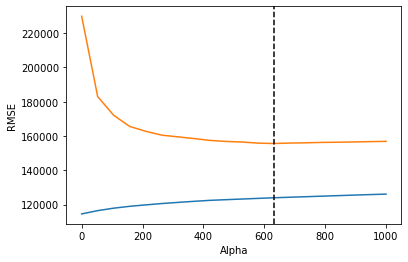

In [41]:
tr_rmse_lasso = []
tt_rmse_lasso = []
alphas_lasso = []

for alpha in np.linspace(0, 1000, num=20):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_tr_sc, y_tr_4)
    tr_pred = lasso.predict(X_tr_sc)
    tr_rmse_lasso.append(np.sqrt(mean_squared_error(y_tr_4, tr_pred)))
    tt_pred = lasso.predict(X_tt_sc)
    tt_rmse_lasso.append(np.sqrt(mean_squared_error(y_tt_4, tt_pred)))
    alphas_lasso.append(alpha)

fig, ax = plt.subplots()
ax.plot(alphas_lasso, tr_rmse_lasso, label="Train")
ax.plot(alphas_lasso, tt_rmse_lasso, label="Test")
ax.set_xlabel("Alpha")
ax.set_ylabel("RMSE")
optimal_alpha = alphas_lasso[np.argmin(tt_rmse_lasso)]
ax.axvline(optimal_alpha, color="black", linestyle="--")
print(f'Optimal Alpha Value: {int(optimal_alpha)}')

In [29]:
best_lasso = Lasso(alpha=600).fit(X_tr_sc, y_tr_4)
best_lasso_tr = best_lasso.predict(X_tr_sc)
best_lasso_tt = best_lasso.predict(X_tt_sc)

train_test_metrics(y_tr_4, y_tt_4, best_lasso_tr, best_lasso_tt)

Training R^2 Score:  0.8828
Training RMSE:  123741.36
Training Bias:  -0.0
Training Variance:  1.1262e+11

Testing R^2 Score:  0.8396
Testing RMSE:  155710.43
Testing Bias:  -11599.4
Testing Variance:  1.1072e+11


# Baseline Model 2

In [36]:
y = df['price']
dum_feat = df[['bathrooms', 'condition', 'grade', 'zipcode']]
dum_index = dum_feat.columns
df_dum = pd.get_dummies(data = dum_feat, columns = dum_index, drop_first = True, prefix = ['bth', 'cnd', 'grd', 'zip'])
poly_feat = df.drop(['price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode', 'sqft_lot15', 'sqft_above', 'sqft_lot'], axis = 1)
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly_data = poly.fit_transform(poly_feat)
poly_columns = poly.get_feature_names(poly_feat.columns)
df_poly = pd.DataFrame(poly_data, columns = poly_columns)
X = pd.concat([df_poly, df_dum], axis = 1)

In [37]:
X_tr2, X_tt2, y_tr2, y_tt2 = train_test_split(X, y, random_state = 42, test_size = 0.2)
lm_2 = LinearRegression().fit(X_tr2, y_tr2)
y_tr_pred2 = lm_2.predict(X_tr2)
y_tt_pred2 = lm_2.predict(X_tt2)

train_test_metrics(y_tr2, y_tt2, y_tr_pred2, y_tt_pred2)


Training R^2 Score:  0.8673
Training RMSE:  131678.92
Training Bias:  -0.0
Training Variance:  1.1331e+11

Testing R^2 Score:  0.8086
Testing RMSE:  170105.65
Testing Bias:  -2216.7
Testing Variance:  1.3629e+11


# Decision Tree Regressor

In [38]:
dtr = DecisionTreeRegressor(random_state=42).fit(X_tr2, y_tr2)
y_tr_pred3 = dtr.predict(X_tr2) 
y_tt_pred3 = dtr.predict(X_tt2)

train_test_metrics(y_tr2, y_tt2, y_tr_pred3, y_tt_pred3)


Training R^2 Score:  0.9998
Training RMSE:  4839.03
Training Bias:  -0.0
Training Variance:  1.3063e+11

Testing R^2 Score:  0.585
Testing RMSE:  250484.05
Testing Bias:  -1534.38
Testing Variance:  1.5807e+11


# Random Forest Regressor

In [39]:
rf = RandomForestRegressor(n_estimators=100, 
                           max_features="auto", 
                           max_depth=100, 
                           min_samples_leaf=4, 
                           min_samples_split=10, 
                           random_state=1).fit(X_tr2, y_tr2)
rf_tr_pred = rf.predict(X_tr2)
rf_tt_pred = rf.predict(X_tt2)

train_test_metrics(y_tr2, y_tt2, rf_tr_pred, rf_tt_pred)

Training R^2 Score:  0.9124
Training RMSE:  106979.17
Training Bias:  -482.58
Training Variance:  1.0438e+11

Testing R^2 Score:  0.7695
Testing RMSE:  186683.45
Testing Bias:  137.03
Testing Variance:  1.2984e+11


In [ ]:
data = [[int(rmse(y_tr, y_tr_pred)), int(rmse(y_tt, y_tt_pred)), bias(y_tr, y_tr_pred), variance(y_tr_pred), bias(y_tt, y_tt_pred), variance(y_tt_pred)],
        [int(rmse(y_tr_2, y_tr_pred_2)), int(rmse(y_tt_2, y_tt_pred_2)), bias(y_tr_2, y_tr_pred_2), variance(y_tr_pred_2), bias(y_tt_2, y_tt_pred_2), variance(y_tt_pred_2)],
        [int(rmse(y_tr_3, y_tr_pred_3)), int(rmse(y_tt_3, y_tt_pred_3)), bias(y_tr_3, y_tr_pred_3), variance(y_tr_pred_3), bias(y_tt_3, y_tt_pred_3), variance(y_tt_pred_3)],
        [int(rmse(y_tr_4, y_tr_pred_4)), int(rmse(y_tt_4, y_tt_pred_4)), bias(y_tr_4, y_tr_pred_4), variance(y_tr_pred_4), bias(y_tt_4, y_tt_pred_4), variance(y_tt_pred_4)],
        [int(rmse(y_tr_5, y_tr_pred_5)), int(rmse(y_tt_5, y_tt_pred_5)), bias(y_tr_5, y_tr_pred_5), variance(y_tr_pred_5), bias(y_tt_5, y_tt_pred_5), variance(y_tt_pred_5)]]

index = ["Baseline", "Poly-2", "Poly-3", "Poly-4", "Poly-5"]

columns = ["Train RMSE", "Test RMSE", "Train Bias", "Train Variance", "Test Bias", "Test Variance"]

poly_feat_df = pd.DataFrame(data=data, index=index, columns=columns)